In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import math
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import csv

In [2]:
path_1 = '../../figures-revision-1/manifold-SRD-long-formal--3-40/nsyb-G7f-rAch1h/within_cluster_distance'
path_2 = '../../figures-revision-1/manifold-SRD-long-formal--3-40/nsyb-G7f-r5HT1.0/within_cluster_distance'
filename = 'within_cluster_distance_test.npy'
result_path = '../../figures-revision-1/manifold-SRD-long-formal--3-40/within_cluster_distance'
if_save = True
if_scale = True
if_p_corr = True
figure_save_path = result_path + '/' + 'figures-peak'
folder = os.path.exists(figure_save_path)
if not folder:
    os.makedirs(figure_save_path)

# load data
data_1 = np.load(path_1 + '/' + filename)
# data_1 = np.delete(data_1,2,0) ## merge bad
data_2 = np.load(path_2 + '/' + filename)
# data_2 = np.delete(data_2,2,0) ## merge bad
print(np.shape(data_1))
print(np.shape(data_2))

# each channel
data_g7f_all = np.concatenate((np.squeeze(data_1[:,1,:,:,:]),np.squeeze(data_2[:,1,:,:,:])),axis = 0)
data_g7f_1 = np.squeeze(data_1[:,1,:,:,:])
data_g7f_2 = np.squeeze(data_2[:,1,:,:,:])
data_g7f_ach = np.squeeze(data_1[:,0,:,:,:])
data_ach = np.squeeze(data_1[:,2,:,:,:])
data_g7f_5ht = np.squeeze(data_2[:,0,:,:,:])
data_5ht = np.squeeze(data_2[:,2,:,:,:])
print(np.shape(data_g7f_ach))
print(np.shape(data_g7f_all))
print(np.shape(data_ach))
print(np.shape(data_g7f_5ht))
print(np.shape(data_5ht))

(10, 3, 4, 43, 20)
(10, 3, 4, 43, 20)
(10, 4, 43, 20)
(20, 4, 43, 20)
(10, 4, 43, 20)
(10, 4, 43, 20)
(10, 4, 43, 20)


[3.81469727e-06 1.90734863e-06 1.90734863e-06 2.02449799e-01
 1.43241882e-03 3.62339020e-02]
corrected:
[7.62939453e-06 5.72204590e-06 5.72204590e-06 2.02449799e-01
 2.14862823e-03 4.34806824e-02]
[0.00976562 0.00976562 0.00195312 0.19335938 0.08398438 0.27539062]
corrected:
[0.01953125 0.01953125 0.01171875 0.23203125 0.12597656 0.27539062]
[0.00195312 0.00195312 0.00585938 0.16015625 0.84570312 0.06445312]
corrected:
[0.00585938 0.00585938 0.01171875 0.1921875  0.84570312 0.09667969]


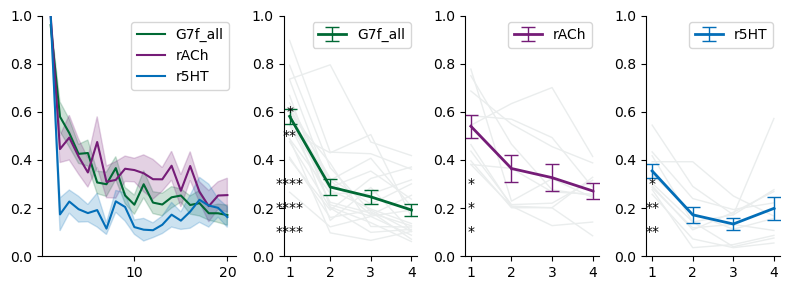

In [3]:
odor_selected = 0
peak_time_range = range(4,18)
part_len = 5
sum_list = [0,4,6]

the_color = ['#006934','#006934','#006934','orange','#751C77','orange','#036EB8']
channel_label = ['G7f_all','G7f_1','G7f_2','G7f+rACh','rACh','G7f+r5HT','r5HT']
p_list = np.zeros((len(sum_list),6))

plt.figure(figsize = (8,3))
grid = plt.GridSpec(4,13)
ax = plt.subplot(grid[0:4,0:4])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# left
for i in sum_list:
    if i == 0:
        data = np.squeeze(data_g7f_all[:,odor_selected,:,:])
    elif i==1:
        data = np.squeeze(data_g7f_1[:,odor_selected,:,:])
    elif i==2:
        data = np.squeeze(data_g7f_2[:,odor_selected,:,:])
    elif i==3:
        data = np.squeeze(data_g7f_ach[:,odor_selected,:,:])
    elif i==4:
        data = np.squeeze(data_ach[:,odor_selected,:,:])
    elif i==5:
        data = np.squeeze(data_g7f_5ht[:,odor_selected,:,:])
    else:
        data = np.squeeze(data_5ht[:,odor_selected,:,:])
    the_peak = np.mean(data[:,peak_time_range,:],1)
    if if_scale:
        for j in range(np.size(the_peak,0)):
            a = np.squeeze(the_peak[j,:])
            the_peak[j,:] = (a-np.min(a))/(np.max(a)-np.min(a))
    the_mean = np.mean(the_peak,0)
    the_std = np.std(the_peak,0,ddof = 1)/math.sqrt(np.size(the_peak,0))
    yy_below = the_mean-the_std
    yy_above = the_mean+the_std
    xx = np.linspace(1,np.size(data,2),np.size(data,2))
    plt.plot(xx, the_mean,color = the_color[i],label = channel_label[i])
    x_fill = np.concatenate((xx,xx[::-1]),axis = 0)
    y_fill = np.concatenate((yy_below,yy_above[::-1]),axis = 0)
    plt.fill(x_fill,y_fill,color = the_color[i],alpha=0.2)
    plt.ylim((0,1))
plt.legend()
# right
id_flag = 0
for i in sum_list:
    if i == 0:
        data = np.squeeze(data_g7f_all[:,odor_selected,:,:])
    elif i==1:
        data = np.squeeze(data_g7f_1[:,odor_selected,:,:])
    elif i==2:
        data = np.squeeze(data_g7f_2[:,odor_selected,:,:])
    elif i==3:
        data = np.squeeze(data_g7f_ach[:,odor_selected,:,:])
    elif i==4:
        data = np.squeeze(data_ach[:,odor_selected,:,:])
    elif i==5:
        data = np.squeeze(data_g7f_5ht[:,odor_selected,:,:])
    else:
        data = np.squeeze(data_5ht[:,odor_selected,:,:])
    the_peak = np.mean(data[:,peak_time_range,:],1)
    if if_scale:
        for j in range(np.size(the_peak,0)):
            a = np.squeeze(the_peak[j,:])
            the_peak[j,:] = (a-np.min(a))/(np.max(a)-np.min(a))
    ax = plt.subplot(grid[0:4,id_flag*3+4:(id_flag+1)*3+4])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    num_part = int(np.size(data,2)/part_len)
    data_part =  np.zeros((np.size(data,0),num_part))
    for j in range(num_part):
        a = the_peak[:,j*part_len:(j+1)*part_len]
        data_part[:,j] = np.mean(a,1)
    for j in range(np.size(data,0)):
        plt.plot(range(num_part),data_part[j,:],color = '#EAEDED',linewidth = 1,alpha = 1)
    the_mean = np.mean(data_part,0)
    the_std = np.std(data_part,0,ddof = 1)/math.sqrt(np.size(data,0))
    plt.errorbar(range(num_part),the_mean,yerr=the_std,ecolor=the_color[i],elinewidth=1,marker='.',mfc=the_color[i],\
	mec=the_color[i],mew=1,ms=1,alpha=1,capsize=5,capthick=3,color=the_color[i], linewidth=2,label = channel_label[i])
    
    flag = 0
    for j in range(num_part-1):
        for k in range(j+1,num_part):
            a = np.squeeze(data_part[:,j])
            b = np.squeeze(data_part[:,k])
            res = wilcoxon(a,b)
            p = res.pvalue
            p_list[id_flag,flag] = p
            flag = flag+1
    print(p_list[id_flag,:])
    if if_p_corr:
        p_corrected = multipletests(p_list[id_flag,:],method = 'fdr_bh')
        p_list[id_flag,:] = p_corrected[1]
        print('corrected:')
        print(p_list[id_flag,:])
    # disp *
    the_p = p_list[id_flag,:]
    for j in range(len(the_p)):
        p = the_p[j]
        if p<0.05 and p>=0.01:
            plt.text(0,j*0.1+0.1,'*',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.01 and p>0.001:
            plt.text(0,j*0.1+0.1,'**',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.001 and p>=0.0001:
            plt.text(0,j*0.1+0.1,'***',verticalalignment = 'center', horizontalalignment = 'center') 
        elif p<0.0001:
            plt.text(0,j*0.1+0.1,'****',verticalalignment = 'center', horizontalalignment = 'center') 
    #
    plt.ylim((0,1))
    plt.xticks([0,1,2,3],[1,2,3,4])
    id_flag = id_flag+1
    plt.legend()
plt.tight_layout()
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/5e_mean_' + filename[:-5]+'_'+'odor_'+str(odor_selected)+'_'+'sum.pdf',dpi = 300,bbox_inches = 'tight')
    plt.savefig(figure_save_path + '/5e_mean_' + filename[:-5]+'_'+'odor_'+str(odor_selected)+'_'+'sum.png',dpi = 300,bbox_inches = 'tight')
plt.show()
if if_save:
    np.save(figure_save_path + '/' + '5e_p_list_sum.npy',p_list)
    with open(figure_save_path + '/' + '5e_p_list_sum.csv', 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(p_list.tolist())